# Anemia Prediction

1) Importing the necessary Python libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

2) Importing the dataset

In [2]:
data = pd.read_csv('Anemia.csv')
data.head(10)

,NO,LAB_TEST,RESULT,REFERENCE_INTERVAL,GENDER,IDENTIFICATION
0,1,Hemoglobin,14.9,13.5 - 17.5,Male,Not Anemia
1,1,MCH,22.7,27.0 - 31.0,Male,Not Anemia
2,1,MCHC,29.1,32.0 - 36.0,Male,Not Anemia
3,1,MCV,83.7,82.0 - 92.0,Male,Not Anemia
4,2,Hemoglobin,15.9,12.0 - 16.0,Female,Not Anemia
5,2,MCH,25.4,27.0 - 31.0,Female,Not Anemia
6,2,MCHC,28.3,32.0 - 36.0,Female,Not Anemia
7,2,MCV,72.0,82.0 - 92.0,Female,Not Anemia
8,3,Hemoglobin,9.0,12.0 - 16.0,Female,Anemia
9,3,MCH,21.5,27.0 - 31.0,Female,Anemia


# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  5684 non-null   int64  
 1   LAB_TEST            5684 non-null   object 
 2   RESULT              5684 non-null   float64
 3   REFERENCE_INTERVAL  5684 non-null   object 
 4   GENDER              5684 non-null   object 
 5   IDENTIFICATION      5684 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 266.6+ KB


In [4]:
data.shape

(5684, 6)

In [5]:
data.columns

Index(['NO', 'LAB_TEST', 'RESULT', 'REFERENCE_INTERVAL', 'GENDER',
       'IDENTIFICATION'],
      dtype='object')

3) Data Cleaning

In [6]:
data.isnull().sum()

NO                    0
LAB_TEST              0
RESULT                0
REFERENCE_INTERVAL    0
GENDER                0
IDENTIFICATION        0
dtype: int64

In [7]:
data['LAB_TEST'].unique()

array(['Hemoglobin', 'MCH', 'MCHC', 'MCV'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['LAB_TEST'] = label_encoder.fit_transform(data['LAB_TEST'])
data['LAB_TEST'].unique()

array([0, 1, 2, 3])

In [9]:
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
data['GENDER'].unique()

array([1, 0])

In [10]:
data.head()

,NO,LAB_TEST,RESULT,REFERENCE_INTERVAL,GENDER,IDENTIFICATION
0,1,0,14.9,13.5 - 17.5,1,Not Anemia
1,1,1,22.7,27.0 - 31.0,1,Not Anemia
2,1,2,29.1,32.0 - 36.0,1,Not Anemia
3,1,3,83.7,82.0 - 92.0,1,Not Anemia
4,2,0,15.9,12.0 - 16.0,0,Not Anemia


In [11]:
data.drop('NO',axis = 'columns',inplace = True)

In [12]:
data.head()

,LAB_TEST,RESULT,REFERENCE_INTERVAL,GENDER,IDENTIFICATION
0,0,14.9,13.5 - 17.5,1,Not Anemia
1,1,22.7,27.0 - 31.0,1,Not Anemia
2,2,29.1,32.0 - 36.0,1,Not Anemia
3,3,83.7,82.0 - 92.0,1,Not Anemia
4,0,15.9,12.0 - 16.0,0,Not Anemia


In [13]:
mapping = {'Not Anemia':'0',
          'Anemia':'1'}
data['IDENTIFICATION'] = data['IDENTIFICATION'].map(mapping)


In [14]:
data['IDENTIFICATION'].value_counts()/len(data)

0    0.563688
1    0.436312
Name: IDENTIFICATION, dtype: float64

In [15]:
data.head()

,LAB_TEST,RESULT,REFERENCE_INTERVAL,GENDER,IDENTIFICATION
0,0,14.9,13.5 - 17.5,1,0
1,1,22.7,27.0 - 31.0,1,0
2,2,29.1,32.0 - 36.0,1,0
3,3,83.7,82.0 - 92.0,1,0
4,0,15.9,12.0 - 16.0,0,0


In [16]:
df = data['REFERENCE_INTERVAL']
data[['Lower_reference_limit','Upper_reference_limit']] = df.str.split("-",expand = True)

In [17]:
data.head()

,LAB_TEST,RESULT,REFERENCE_INTERVAL,GENDER,IDENTIFICATION,Lower_reference_limit,Upper_reference_limit
0,0,14.9,13.5 - 17.5,1,0,13.5,17.5
1,1,22.7,27.0 - 31.0,1,0,27.0,31.0
2,2,29.1,32.0 - 36.0,1,0,32.0,36.0
3,3,83.7,82.0 - 92.0,1,0,82.0,92.0
4,0,15.9,12.0 - 16.0,0,0,12.0,16.0


In [18]:
data.drop('REFERENCE_INTERVAL',axis = 'columns', inplace = True)

In [19]:
data.head()

,LAB_TEST,RESULT,GENDER,IDENTIFICATION,Lower_reference_limit,Upper_reference_limit
0,0,14.9,1,0,13.5,17.5
1,1,22.7,1,0,27.0,31.0
2,2,29.1,1,0,32.0,36.0
3,3,83.7,1,0,82.0,92.0
4,0,15.9,0,0,12.0,16.0


In [20]:
column_names = ['LAB_TEST','GENDER','Lower_reference_limit','Upper_reference_limit','RESULT',
                 'IDENTIFICATION']
data = data.reindex(columns = column_names)

In [21]:
data.head()

,LAB_TEST,GENDER,Lower_reference_limit,Upper_reference_limit,RESULT,IDENTIFICATION
0,0,1,13.5,17.5,14.9,0
1,1,1,27.0,31.0,22.7,0
2,2,1,32.0,36.0,29.1,0
3,3,1,82.0,92.0,83.7,0
4,0,0,12.0,16.0,15.9,0


In [22]:
data.columns

Index(['LAB_TEST', 'GENDER', 'Lower_reference_limit', 'Upper_reference_limit',
       'RESULT', 'IDENTIFICATION'],
      dtype='object')

In [23]:
data['Upper_reference_limit'] = data['Upper_reference_limit'].astype(float)
data['Lower_reference_limit'] = data['Lower_reference_limit'].astype(float)

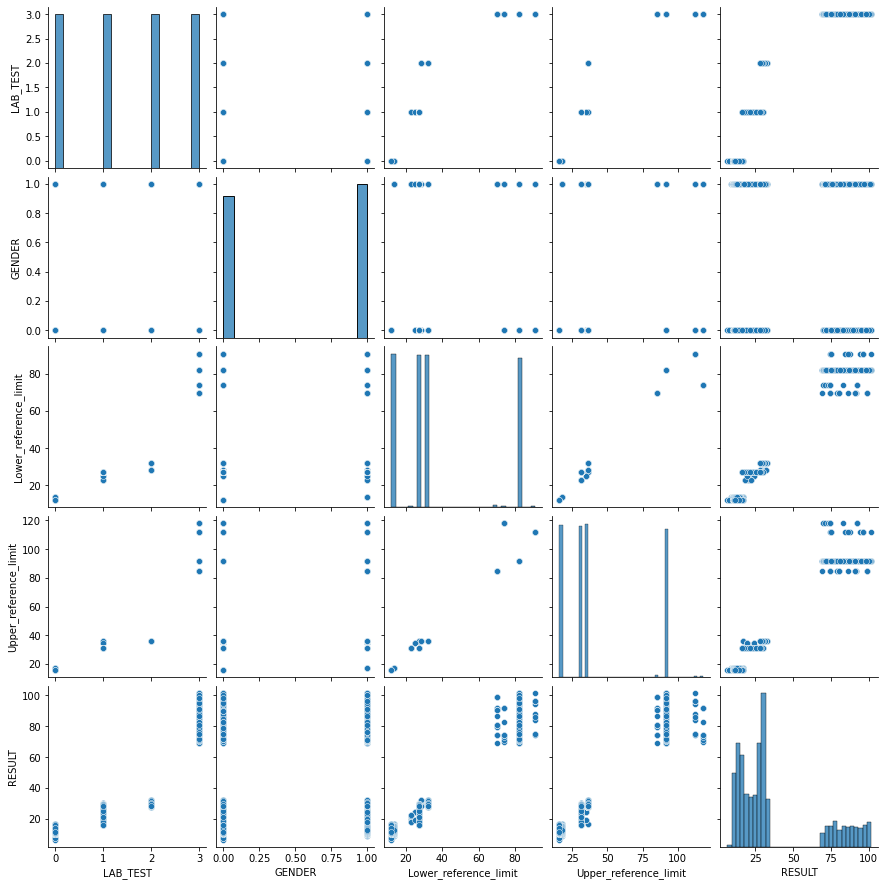

In [24]:
pairplot = data[['LAB_TEST', 'GENDER', 'Lower_reference_limit', 'Upper_reference_limit',
       'RESULT']]
sns.pairplot(pairplot)

In [25]:
#plt.scatter(range(0,5684),data['RESULT'])
#sns.boxplot(data['RESULT'])


In [26]:
x = data.drop(columns = 'IDENTIFICATION')
y = data['IDENTIFICATION']

4) Scaling the Data Set

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [28]:
numerical_columns = ['LAB_TEST','GENDER','Lower_reference_limit','Upper_reference_limit']

In [29]:
data[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LAB_TEST               5684 non-null   int32  
 1   GENDER                 5684 non-null   int32  
 2   Lower_reference_limit  5684 non-null   float64
 3   Upper_reference_limit  5684 non-null   float64
dtypes: float64(2), int32(2)
memory usage: 133.3 KB


In [30]:
data['LAB_TEST'].astype('int64')
data['GENDER'].astype('int64')
data[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LAB_TEST               5684 non-null   int32  
 1   GENDER                 5684 non-null   int32  
 2   Lower_reference_limit  5684 non-null   float64
 3   Upper_reference_limit  5684 non-null   float64
dtypes: float64(2), int32(2)
memory usage: 133.3 KB


5) Treating the outliers

<AxesSubplot:>

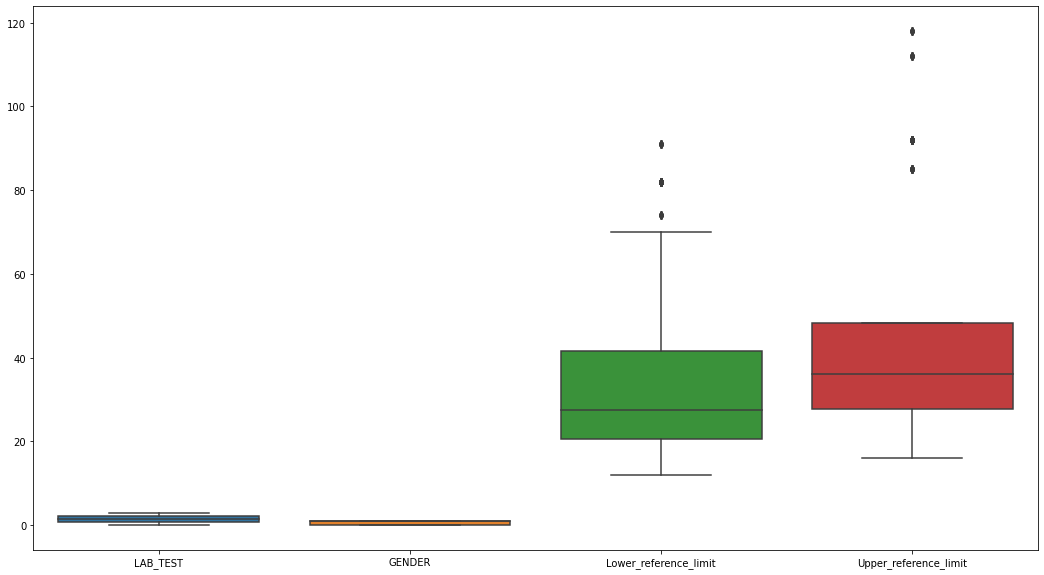

In [31]:
plt.figure(figsize = (18,10))
sns.boxplot(data=data[numerical_columns])


In [32]:
def cap_data(data):
    for col in numerical_columns:
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.25,0.75]).values
            iqr = percentiles[1]-percentiles[0]
            upper_limit = percentiles[1] + 1.5*iqr
            lower_limit = percentiles[0] -1.5*iqr
            data[col][data[col] <= percentiles[0]] = lower_limit
            data[col][data[col] >= percentiles[1]] = upper_limit
        else:
            data[col]=data[col]
    return data

cap_data(data)

,LAB_TEST,GENDER,Lower_reference_limit,Upper_reference_limit,RESULT,IDENTIFICATION
0,0,1,-10.6875,-3.3125,14.9,0
1,1,1,27.0000,31.0000,22.7,0
2,2,1,32.0000,36.0000,29.1,0
3,3,1,72.8125,79.1875,83.7,0
4,0,0,-10.6875,-3.3125,15.9,0
...,...,...,...,...,...,...
5679,3,0,72.8125,79.1875,95.2,0
5680,0,0,-10.6875,-3.3125,11.8,1
5681,1,0,27.0000,31.0000,21.2,1
5682,2,0,32.0000,36.0000,28.4,1


<AxesSubplot:>

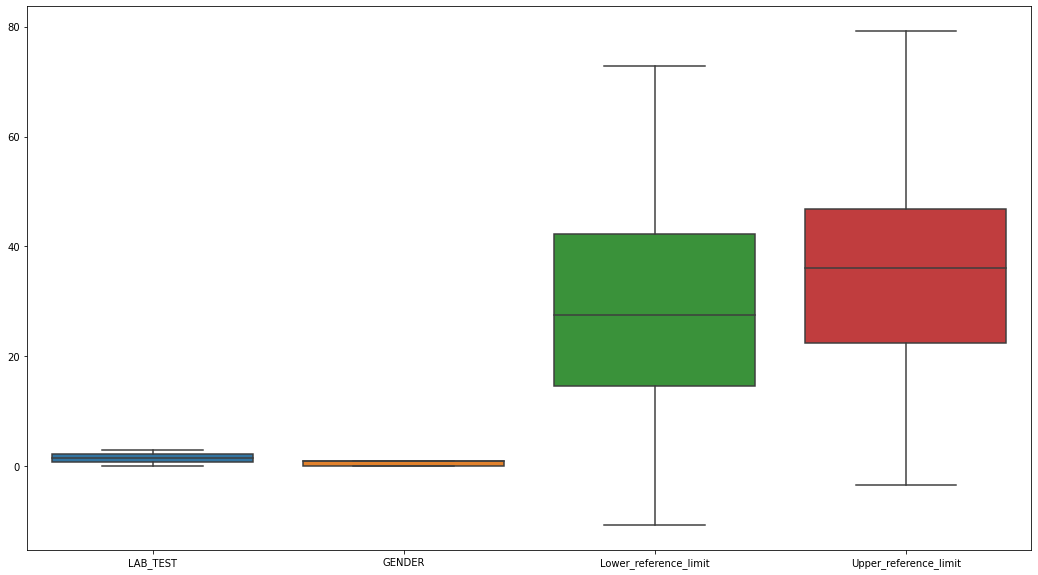

In [33]:
plt.figure(figsize = (18,10))
sns.boxplot(data=data[numerical_columns])


6) Treating the Multicollinearity

In [34]:
corr_matrix = x.corr()
corr_matrix.head()

,LAB_TEST,GENDER,Lower_reference_limit,Upper_reference_limit,RESULT
LAB_TEST,1.000000,0.000000,0.909774,0.899174,0.875279
GENDER,0.000000,1.000000,0.005289,0.006153,-0.003005
Lower_reference_limit,0.909774,0.005289,1.000000,0.998112,0.979040
Upper_reference_limit,0.899174,0.006153,0.998112,1.000000,0.979095
RESULT,0.875279,-0.003005,0.979040,0.979095,1.000000


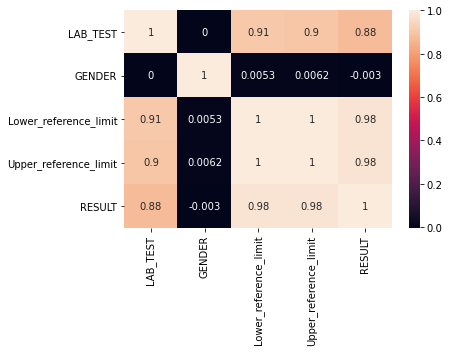

In [35]:
sns.heatmap(corr_matrix,annot = True)
plt.show()

# Splitting the dataset

In [36]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train,y_test = tts(scaled_x, y, train_size = 0.7,stratify = None)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3978, 5), (1706, 5), (3978,), (1706,))

# Classification Model

1) Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [38]:
classifier.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [39]:
y_pred = classifier.predict(x_test)
predicted_proba = classifier.predict_proba(x_test)
predicted_proba

array([[0.39110252, 0.60889748],
       [0.55191901, 0.44808099],
       [0.38866184, 0.61133816],
       ...,
       [0.41320358, 0.58679642],
       [0.60216087, 0.39783913],
       [0.38866184, 0.61133816]])

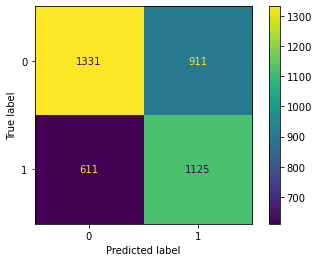

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_train,y_train)
plt.show()

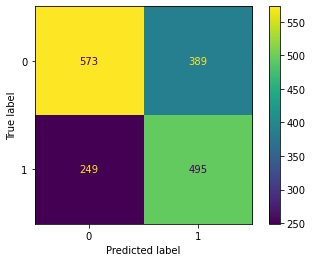

In [41]:
plot_confusion_matrix(classifier, x_test,y_test)
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6260257913247362

In [43]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred)
print(k)

              precision    recall  f1-score   support

           0       0.70      0.60      0.64       962
           1       0.56      0.67      0.61       744

    accuracy                           0.63      1706
   macro avg       0.63      0.63      0.63      1706
weighted avg       0.64      0.63      0.63      1706



In [44]:
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points = precision_recall_curve(y_test,
                                                                        predicted_proba[:,1],pos_label = '1')
precision_points.shape,recall_points.shape,threshold_points.shape

((678,), (678,), (677,))

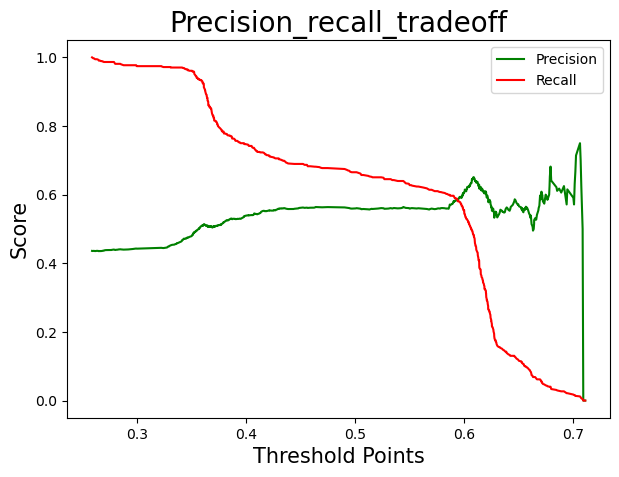

In [45]:
plt.figure(figsize = (7,5),dpi = 100)
plt.plot(threshold_points,precision_points[:-1],color = 'green',label = 'Precision')
plt.plot(threshold_points, recall_points[:-1],color = 'red',label = 'Recall')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.title('Precision_recall_tradeoff',fontsize = 20)
plt.legend()

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,predicted_proba[:,-1],pos_label = '1')

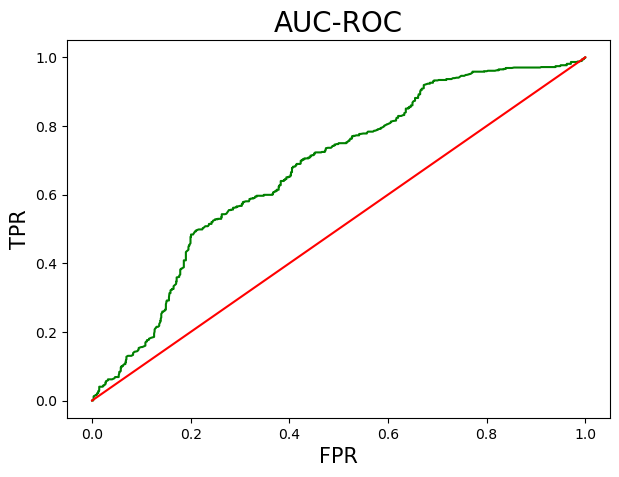

0.6748359712069388

In [47]:
plt.figure(figsize = (7,5),dpi = 100)
plt.plot(fpr,tpr, color = 'green')
plt.plot([0,1],[0,1],label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test,predicted_proba[:,1])

In [48]:
c = classifier.coef_.reshape(-1)
x = x.columns
coeff_plot = pd.DataFrame({
    'coefficients':c,
    'variables':x,
    })
#sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variables
4,-0.834313,RESULT
0,-0.047015,LAB_TEST
3,0.067038,Upper_reference_limit
1,0.506983,GENDER
2,0.779267,Lower_reference_limit


Text(0.5, 1.0, 'Coefficients plot')

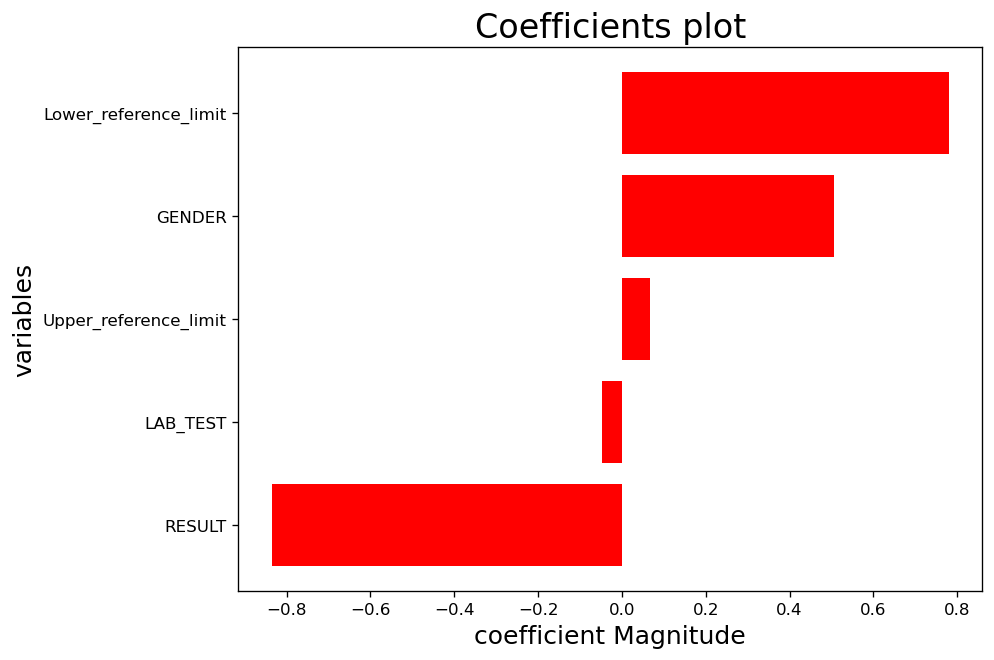

In [59]:
plt.figure(figsize = (8,6),dpi = 120)
plt.barh(coeff_plot['variables'],coeff_plot['coefficients'],color = 'red')
plt.xlabel('coefficient Magnitude',fontsize = 15)
plt.ylabel('variables',fontsize = 15)
plt.title('Coefficients plot',fontsize = 20)

2) Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train, y_train)
y_pred2 = rfc.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred2)
accuracy

0.8106682297772567

In [52]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred2)
print(k)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       962
           1       0.78      0.80      0.79       744

    accuracy                           0.81      1706
   macro avg       0.81      0.81      0.81      1706
weighted avg       0.81      0.81      0.81      1706



3) K- Nearest Neighbours

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(x_train, y_train)

y_pred3 = knn.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred3)
accuracy

0.7467760844079718

In [55]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred3)
print(k)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       962
           1       0.72      0.69      0.70       744

    accuracy                           0.75      1706
   macro avg       0.74      0.74      0.74      1706
weighted avg       0.75      0.75      0.75      1706



4) Support Vector Machine

In [56]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(x_train, y_train)
y_pred4 = svc_model.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred4)
accuracy

0.6518171160609613

In [58]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred4)
print(k)

              precision    recall  f1-score   support

           0       0.72      0.63      0.67       962
           1       0.59      0.68      0.63       744

    accuracy                           0.65      1706
   macro avg       0.65      0.65      0.65      1706
weighted avg       0.66      0.65      0.65      1706



On comparing all these models it is found that the Random Forest model predicts most precisely with a recall score of (0.82,0.8)